In [1]:
import cv2

In [2]:
def load_image(filename):
    return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import os
from random import choice

rnd = choice(os.listdir('../dataset/rgb/train/homer_simpson/'))
print(rnd)
filename = f"../dataset/rgb/train/homer_simpson/{rnd}"
print(filename)

pic_1120.jpg
../dataset/rgb/train/homer_simpson/pic_1120.jpg


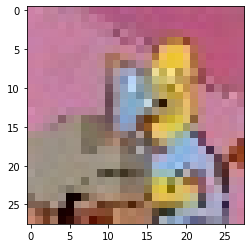

In [5]:
imshow(load_image(filename))

In [6]:
b = '../dataset/rgb/train'

In [7]:
num_classes = 10
grid_size = 10
by_factor = grid_size // num_classes
fs = list()
for i in range(grid_size*by_factor):
    for c in os.listdir(b):
        fs.append(f"{b}/{c}/{os.listdir(f'{b}/{c}')[i]}")

In [8]:
fs[:5]

['../dataset/rgb/train/krusty_the_clown/pic_0026.jpg',
 '../dataset/rgb/train/ned_flanders/pic_0026.jpg',
 '../dataset/rgb/train/homer_simpson/pic_2184.jpg',
 '../dataset/rgb/train/lisa_simpson/pic_0026.jpg',
 '../dataset/rgb/train/marge_simpson/pic_0026.jpg']

In [9]:
res = list()
curr_fs = list()
for f in fs:
    curr_fs.append(f)
    if len(curr_fs) == grid_size:
        imgs = [load_image(f_) for f_ in curr_fs]
        res.append(np.array(imgs))
        curr_fs = list()

In [10]:
res = np.array(res)
res.shape

(10, 10, 28, 28, 3)

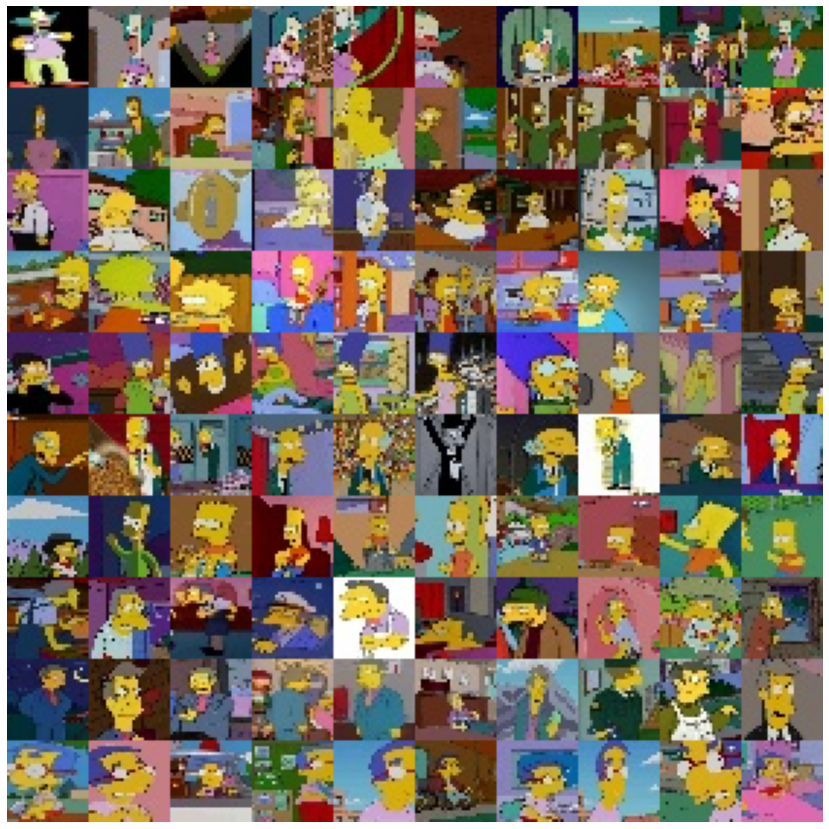

In [11]:
figsize(15, 15)
imshow(np.concatenate(res.reshape((grid_size, grid_size*28, 28, 3)), axis=1))
plt.axis('off');
plt.savefig('images/rgb-overview.jpg', bbox_inches='tight')